In [22]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/DA_Dataset/modified_climate_change.csv")
df.rename(columns={'CFC-12':'CFC_12', 'CFC-11': 'CFC_11'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  234 non-null    int64  
 1   Year        234 non-null    int64  
 2   Month       234 non-null    int64  
 3   MEI         234 non-null    float64
 4   CO2         234 non-null    float64
 5   CH4         234 non-null    float64
 6   N2O         234 non-null    float64
 7   CFC_11      234 non-null    float64
 8   CFC_12      234 non-null    float64
 9   TSI         234 non-null    float64
 10  Aerosols    234 non-null    float64
 11  Temp        234 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 22.1 KB


In [4]:
df.isnull().sum()

Unnamed: 0    0
Year          0
Month         0
MEI           0
CO2           0
CH4           0
N2O           0
CFC_11        0
CFC_12        0
TSI           0
Aerosols      0
Temp          0
dtype: int64

In [5]:
df.head()

,Unnamed: 0,Year,Month,MEI,CO2,CH4,N2O,CFC_11,CFC_12,TSI,Aerosols,Temp
0,231,2002,8,0.922,371.83,1766.58,316.900,258.399,542.882,1366.3053,0.0021,0.417
1,238,2003,3,0.819,376.48,1797.44,317.403,256.985,543.149,1366.1968,0.0026,0.418
2,247,2003,12,0.315,375.93,1795.07,318.129,255.522,543.199,1366.2899,0.0027,0.519
3,71,1989,4,-0.842,355.59,1724.08,307.662,253.623,462.960,1366.5902,0.0060,0.083
4,23,1985,4,-0.484,348.20,1675.24,305.093,211.111,377.635,1365.5120,0.0138,-0.042


In [6]:
df.describe()

,Unnamed: 0,Year,Month,MEI,CO2,CH4,N2O,CFC_11,CFC_12,TSI,Aerosols,Temp
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,156.816239,1995.940171,6.534188,0.232705,363.711068,1751.457778,312.582021,251.818658,498.903603,1366.069102,0.011330,0.266714
std,88.970581,7.409877,3.448099,0.907403,12.625556,45.864883,5.217709,20.014985,58.296673,0.409243,0.016639,0.178377
min,1.000000,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.746000,192.057000,351.848000,1365.426100,0.001600,-0.155000
25%,78.250000,1989.000000,4.000000,-0.435000,353.707500,1722.835000,308.394500,246.966750,474.591250,1365.714700,0.002625,0.145000
50%,162.500000,1996.000000,6.500000,0.184000,363.105000,1767.710000,312.194000,258.344000,531.924000,1365.928650,0.005400,0.266000
75%,232.500000,2002.000000,10.000000,0.773250,373.902500,1787.642500,317.102000,265.983750,541.066000,1366.369700,0.010800,0.417750
max,307.000000,2008.000000,12.000000,3.001000,388.500000,1812.880000,322.182000,271.494000,543.813000,1367.178300,0.097800,0.651000


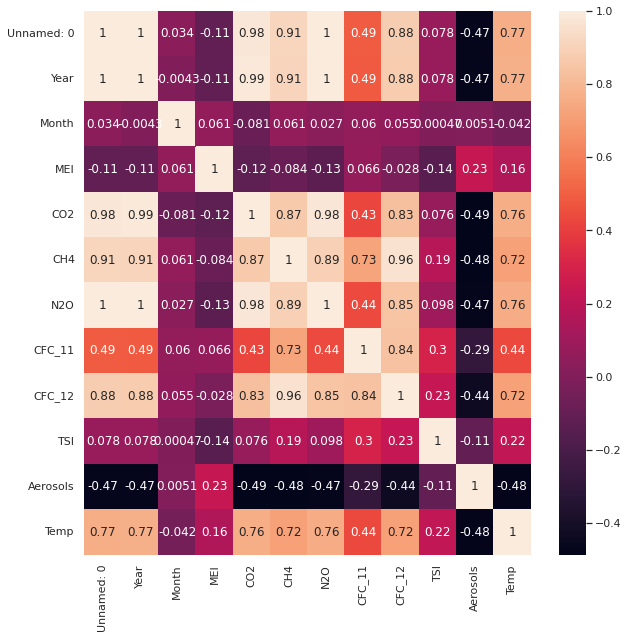

In [7]:
sns.set(rc={"figure.figsize": (10,10)}) 
sns.heatmap(df.corr(), annot=True)

In [8]:
fig = px.bar(df, x="Month", y="MEI", hover_data=['Year'])
fig.show()

In [9]:
df1 = df.sort_values('Year')

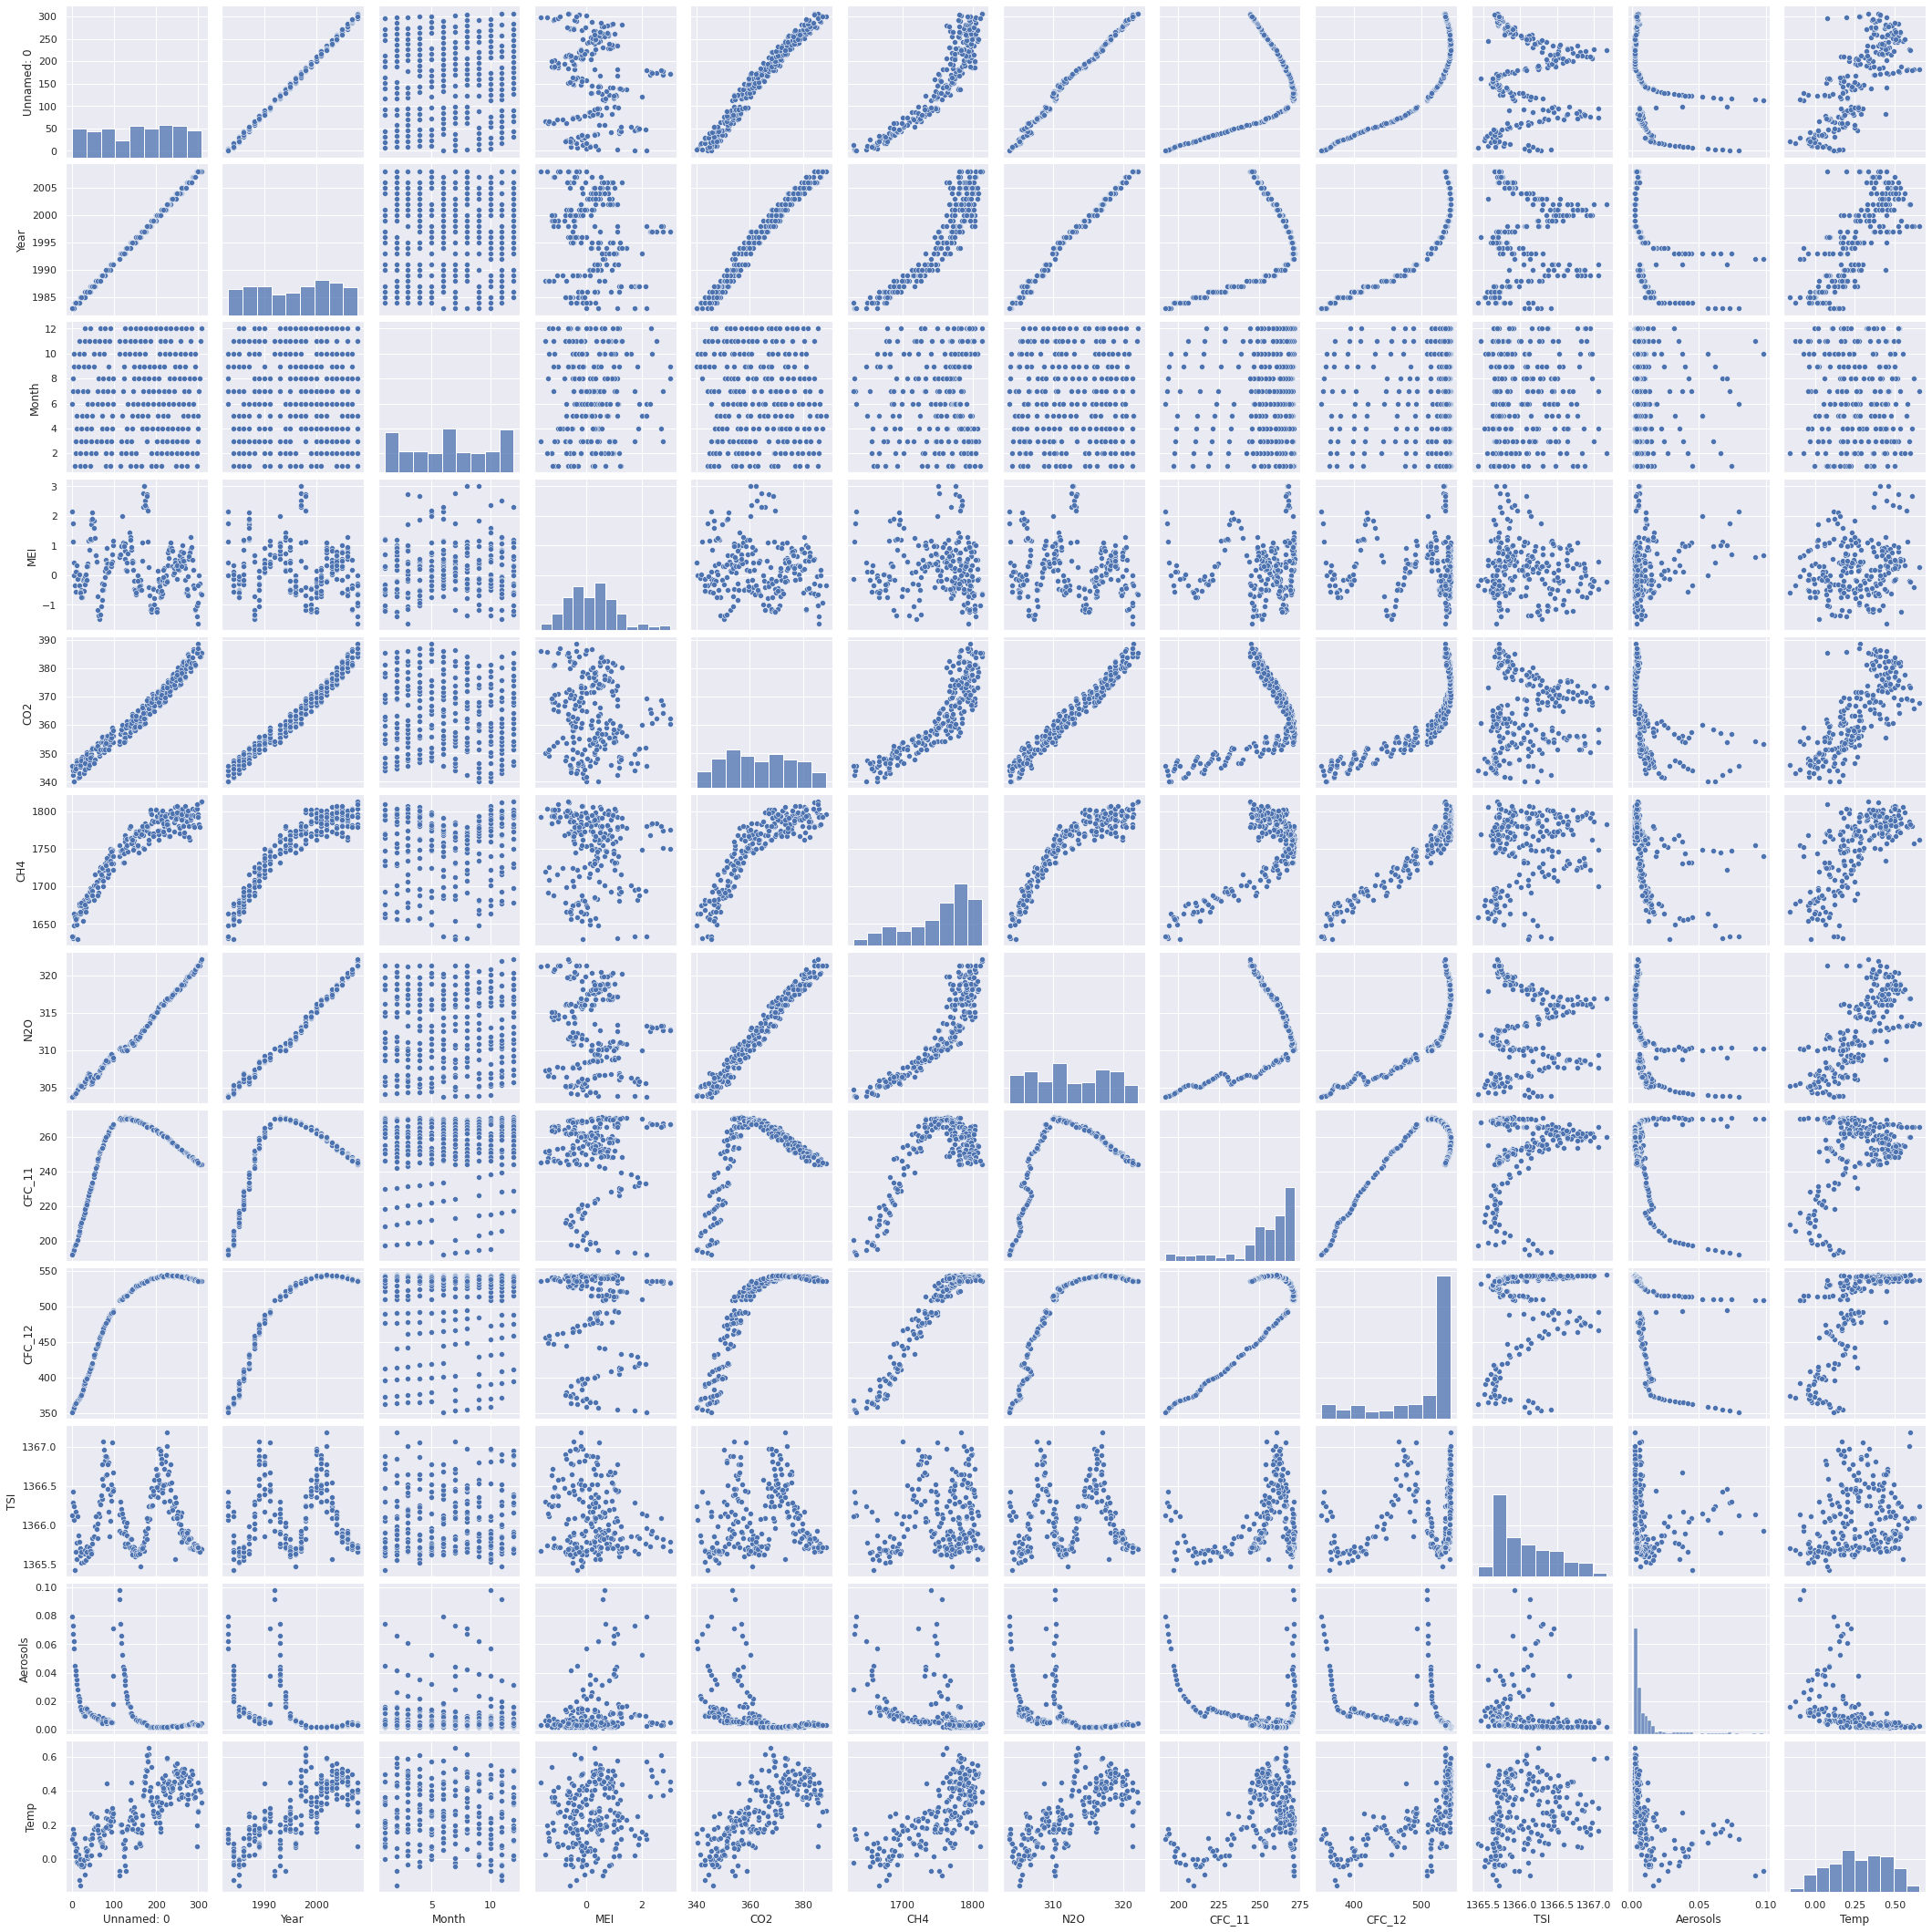

In [10]:
sns.pairplot(df1)

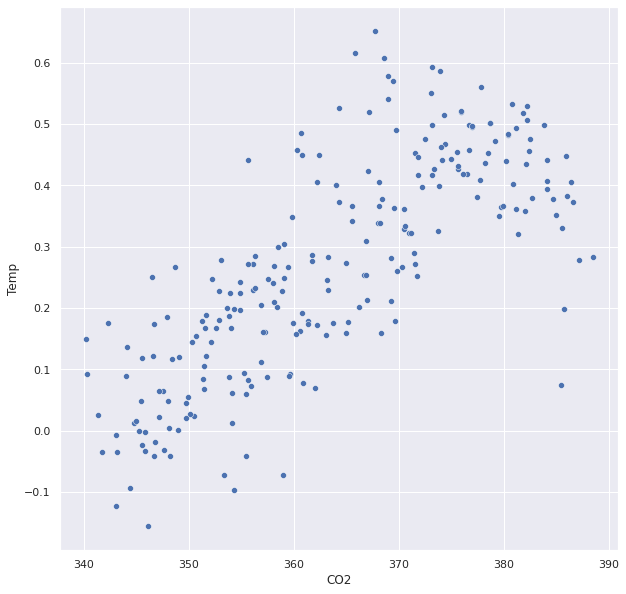

In [11]:
sns.scatterplot(x=df['CO2'],y=df['Temp'])

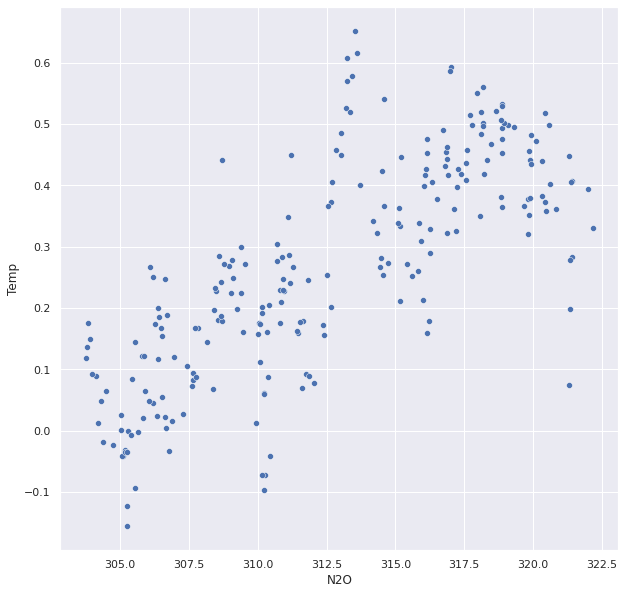

In [12]:
sns.scatterplot(x=df['N2O'],y=df['Temp'])

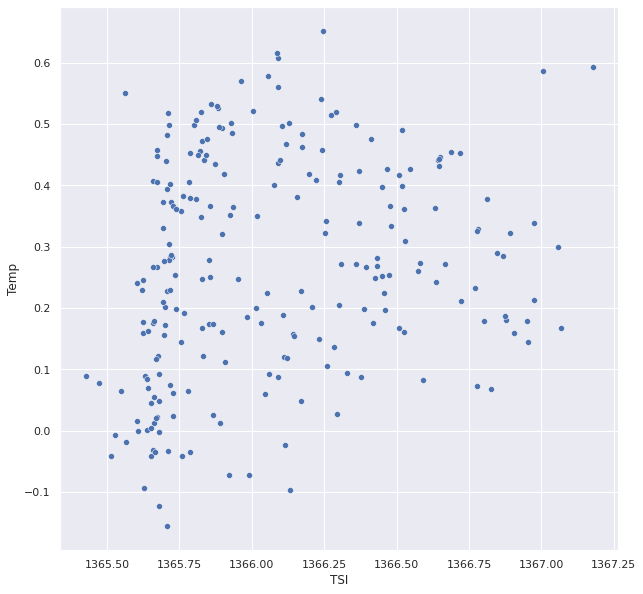

In [13]:
sns.scatterplot(x=df['TSI'],y=df['Temp'])

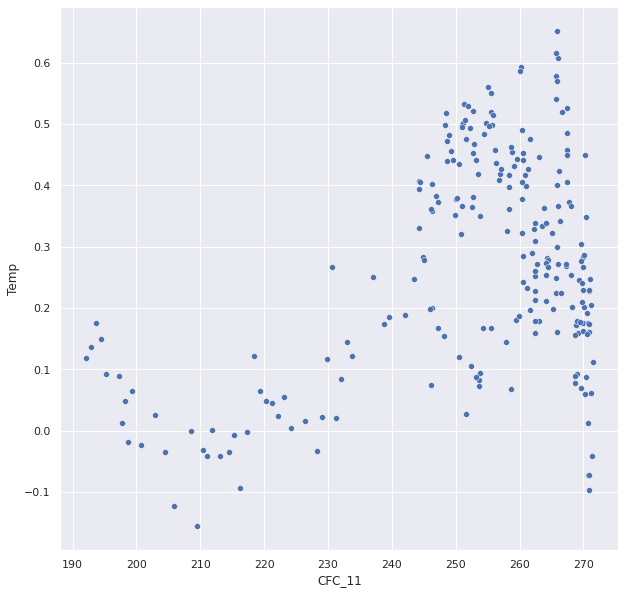

In [14]:
sns.scatterplot(x=df['CFC_11'],y=df['Temp'])

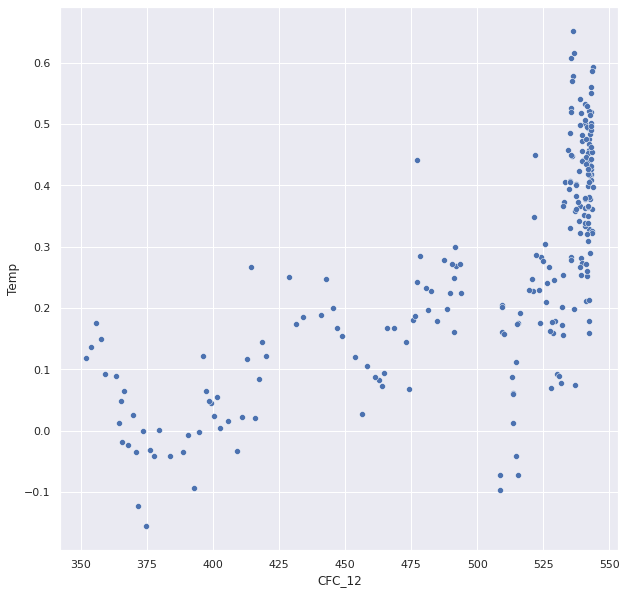

In [16]:
sns.scatterplot(x=df['CFC_12'],y=df['Temp'])

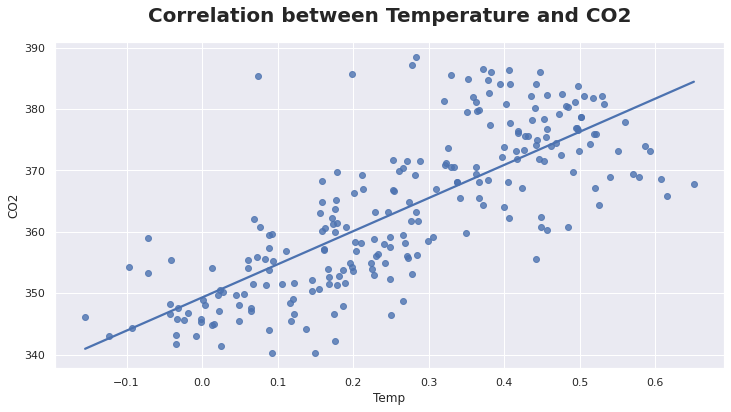

In [23]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Temp', y='CO2', data=df, ci=None);
plt.title('Correlation between Temperature and CO2', fontsize=20, fontweight='bold', pad=20);

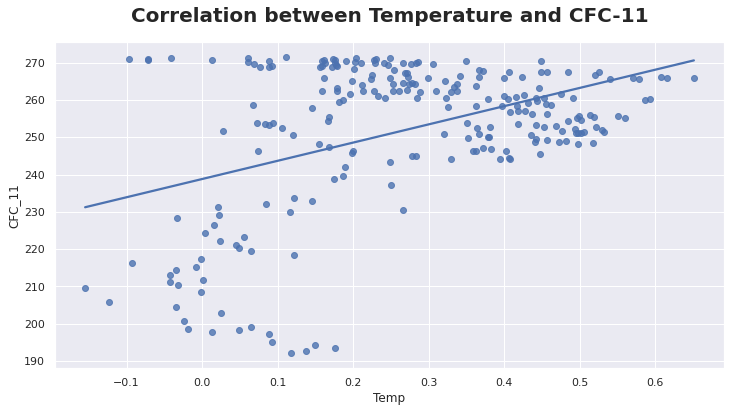

In [24]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Temp', y='CFC_11', data=df, ci=None);
plt.title('Correlation between Temperature and CFC-11', fontsize=20, fontweight='bold', pad=20);

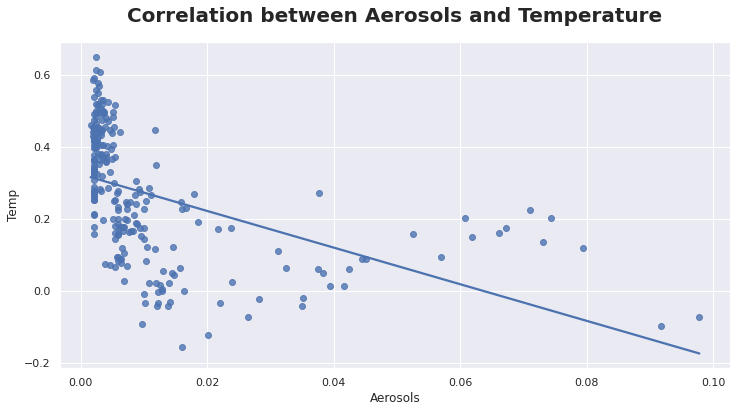

In [25]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Aerosols', y='Temp', data=df, ci=None);
plt.title('Correlation between Aerosols and Temperature', fontsize=20, fontweight='bold', pad=20);

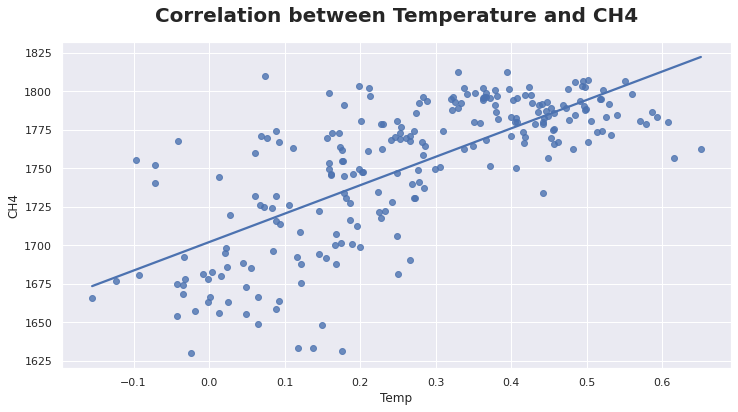

In [26]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Temp', y='CH4', data=df, ci=None);
plt.title('Correlation between Temperature and CH4', fontsize=20, fontweight='bold', pad=20);

In [27]:
fig = px.bar(df1, x='Year', y='Temp')
fig.show()

In [28]:
fig = px.box(df1, x='CFC_11')
fig.show()

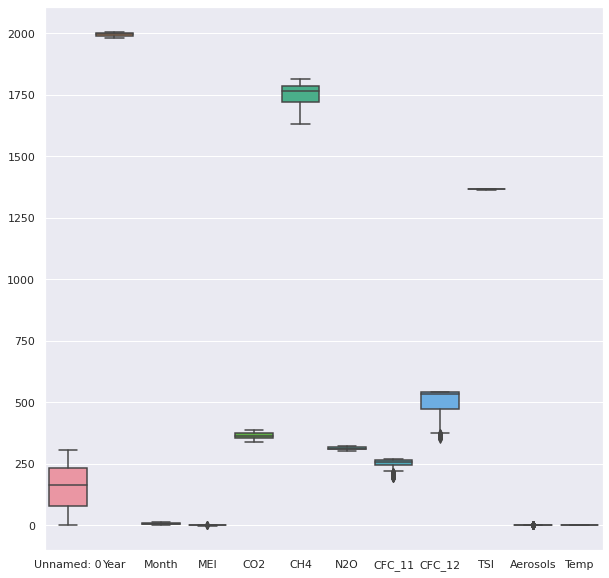

In [29]:
sns.boxplot(data=df1)

In [30]:
from scipy import stats
df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]

In [31]:
fig = px.box(df1, x='CFC_12')
fig.show()

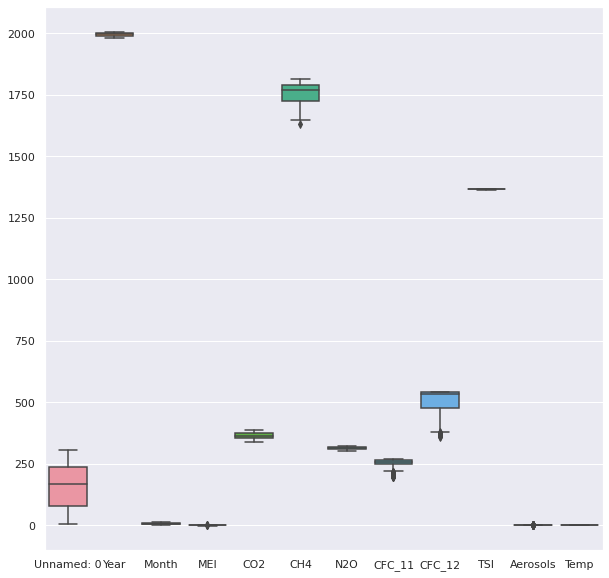

In [32]:
sns.boxplot(data=df1)

In [33]:
fig = px.box(df1, x='Temp')
fig.show()

In [34]:
# df1 = df1.drop(columns=['N2O'], axis=1)

As N2O and CO2 have same distribution, ignoring N2O

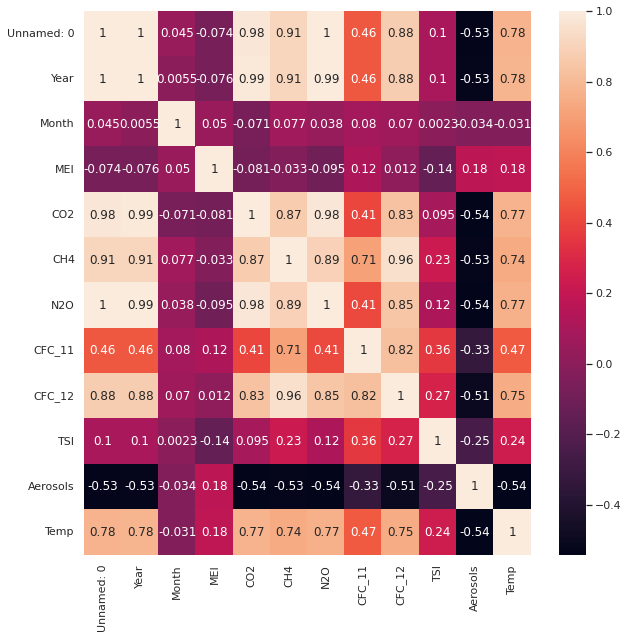

In [35]:
sns.set(rc={"figure.figsize": (10,10)}) 
sns.heatmap(df1.corr(), annot=True)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df1[list(df1.columns)], df1['Temp'], test_size=0.2, random_state=42)

In [47]:
X_train.to_csv("/content/drive/MyDrive/DA_Dataset/modified_climate_change.csv")

Global hypothesis:<br>
H0: β1 = β2 = β3 = β4 = β5 = 0<br>
Ha: β1 ≠ β2 ≠ β3 ≠ β4 ≠ β5 ≠ 0<br>
Hypothesis for individual parameters:<br>
H0: βi = 0<br>
Ha: βi ≠ 0<br><br>
We are not considering Year and moth as given in PS also we are negliecting N2O as N2O and CO2 has similar distribution<br><br>
To check my assumptions, I used SAS software which readily provided the statistical data I needed. I used the method of forward elimination for selection of variables for my multivariate linear regression model. α value was 5% i.e. 0.05.
1) As the forward elimination methodology demands I entered the variables in decreasing order of their correlation values. On entering variable CO2 which had correlation value of 0.75, I got R2 value as 0.5822. Here, F0.95(1, 232) = 3.88 which is far lesser that obtained F-value of 323.28. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Here, for the variable CO2, p-value is less than α value of 0.05. Hence, we reject the individual hypothesis.<br>
2) Then I entered variable CH4. On entering the CH4 column which had correlation value of 0.71, I got R2 value as 0.5937. Here, F0.95(2, 231) = 3.03 which is far lesser that obtained F-value of 168.77. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Here, for both the variables, p-values are less than α value of 0.05. Hence, we reject the individual hypothesis.<br>
3) Then I entered variable CFC_12. On entering the CFC_12 column which had correlation value of 0.7, I got R2 value as 0.6097. Here, F0.95(3, 289) = 2.64 which is far lesser that obtained F-value of 119.77. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Here, for the variable CH4, p-value is more than α value of 0.05. Hence, we accept the individual hypothesis. Dropping CH4<br>
4) Then I entered variable Aerosols. On entering the Aerosols column which had correlation value of -0.46, I got R2 value as 0.6184. Here, F0.95(3, 289) = 2.64 which is far lesser that obtained F-value of 124.23. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Hence, we have to verify individual hypothesis. Here, for both the variables, p-values are less than α value of 0.05. Hence, we reject the individual hypothesis<br>
5) Then I entered variable CFC_11. On entering the CFC_11 column which had correlation value of 0.41, I got R2 value as 0.6334. Here, F0.95(4, 229) = 2.41 which is far lesser that obtained F-value of 98.9. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Here, for the variable CO2, p-value is more than α value of 0.05. Hence, we accept the individual hypothesis. Dropping CO2<br>
6) Then I entered variable MEI. On entering the MEI column which had correlation value of 0.18, I got R2 value as 0.7072. Here, F0.95(4, 229) = 2.41 which is far lesser that obtained F-value of 138.26. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Here, for both the variables, p-values are less than α value of 0.05. Hence, we reject the individual hypothesis<br>
7) Then I entered variable TSI. On entering the TSI column which had correlation value of 0.18, I got R2 value as 0.7343. Here, F0.95(5, 287) = 2.25 which is far lesser that obtained F-value of 126.05. Hence, I rejected the null hypothesis. As it is rejected, we are sure that at least one of the β value is non zero. Hence, we have to verify individual hypothesis. Here, for all the variables, p-values are less than α value of 0.05. Hence, we accept the individual hypothesis. <br>

In [37]:
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

In [38]:
variables = ['CFC_12', 'Aerosols', 'CFC_11', 'MEI', 'TSI']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df1[variables], df1['Temp'], test_size=0.2, random_state=42)
LinearRegression_model=LinearRegression(fit_intercept=True,normalize=True,copy_X=True, n_jobs=10)

In [40]:
LR = LinearRegression_model.fit(X_train[variables],y_train)

print("Co-efficient: ", LR.coef_)
print("Intercept: ",LR.intercept_)

Co-efficient:  [ 3.43998584e-03 -4.01300477e+00 -5.94819449e-03  5.83515408e-02
  6.71401611e-02]
Intercept:  -91.64229709865847


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





In [41]:
y_pred_LR=LinearRegression_model.predict(X_test[variables])
print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR)*100)

 The Score Linear Regression  66.14687123259586


In [42]:
# from scipy import stats
dft = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [43]:
variables = ['Aerosols', 'N2O', 'MEI', 'TSI']
X_train, X_test, y_train, y_test = train_test_split(dft[variables], dft['Temp'], test_size=0.2, random_state=42)
LinearRegression_model=LinearRegression(fit_intercept=True,normalize=True,copy_X=True, n_jobs=10)
LR = LinearRegression_model.fit(X_train[variables],y_train)

print("Co-efficient: ", LR.coef_)
print("Intercept: ",LR.intercept_)

Co-efficient:  [-4.39518479  0.02121295  0.06245159  0.04805188]
Intercept:  -71.97908767076719


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





In [44]:
y_pred_LR=LinearRegression_model.predict(X_test[variables])
print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR)*100)

 The Score Linear Regression  74.22599956882996


<b>Conclusion:</b><br>
<b>Problem 1.2</b><br>
From the analysis of the results obtained from tests performed in SAS software, I came to know that the variables 'CFC_12', 'Aerosols', 'CFC_11', 'MEI', 'TSI' are significant in the model i.e. their p-value is below 0.05. <br>
<b>Problem 2.1</b><br>
All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set. To verify this, I tried removing/adding some of the variables and observed different values of coefficient indicating its dependence on values of coefficient of other variables.<br>
The variables CO2, CH4, CFC_12 and Temp are having high correlation with N20 (absolute correlation greater than 0.7)<br>
The variables CH4, CFC_12 are having high correlation with CFC_11 (absolute correlation greater than 0.7)<br>
<b>Problem 3</b><br>
The coefficient of N2O in this reduced model is 0.02399865.<br>
The r2 value obtained by this model is 0.6338 which is quiet low. Also, the previous model had no N2O variable as its independent variable.

